# Open-world Experiments - Binary Classification with SVM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df_unmon = pd.read_csv("/content/drive/MyDrive/Machine Learning/팀 과제/unmon.csv", header=None)

In [4]:
# Transpose data
df_unmon = df_unmon.transpose()
df_unmon.rename(columns=df_unmon.iloc[0], inplace=True)
df_unmon = df_unmon.drop(df_unmon.index[0])
df_unmon['Label'] = df_unmon['Label'].astype('int')

In [5]:
# Extract X and y
X = np.array(df_unmon.iloc[:, 1:])
y = np.array(df_unmon['Label'])

In [6]:
# Extract feature importance by using decision tree classifier
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_
feature_imp = pd.Series(importance, index=df_unmon.iloc[:, 1:].columns).sort_values(ascending=False)

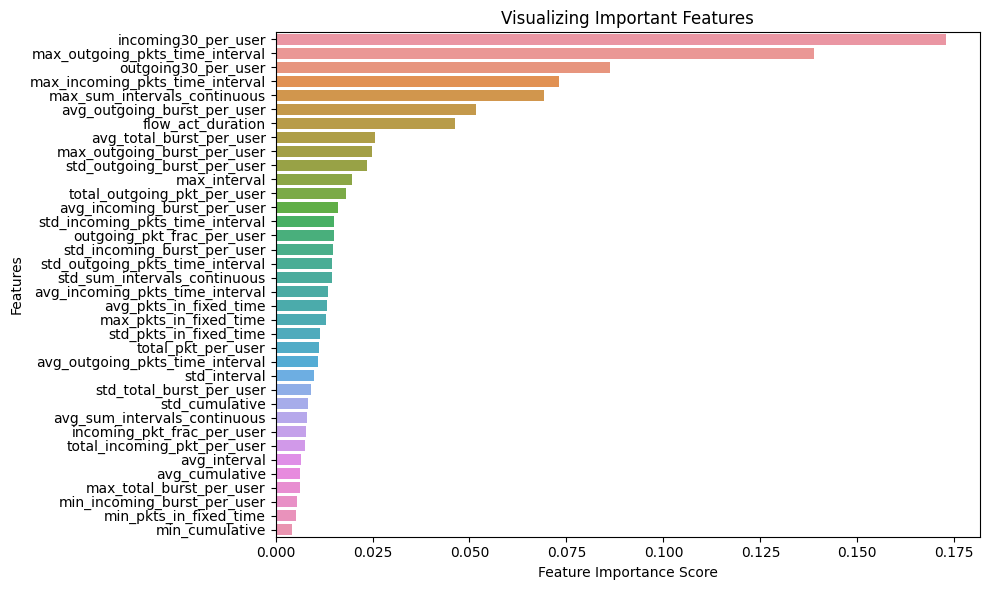

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

# SVM model training and evaluation function

In [8]:
def svm_model_top_n_grid_search(top_n):
    # Extract n most important features
    X_svm = np.array(df_unmon[feature_imp.index[:top_n]])

    # Split data
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y, test_size=0.2, random_state=42)

    # Normalization
    scaler_svm = StandardScaler()
    X_train_svm = scaler_svm.fit_transform(X_train_svm)
    X_test_svm = scaler_svm.transform(X_test_svm)

    # SVM model with GridSearch
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
    grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
    grid_svm.fit(X_train_svm, y_train_svm)

    # Best accuracy and parameters
    print('Best accuracy:', grid_svm.best_score_)
    print('Best parameters:', grid_svm.best_params_)

    # Performance
    pred_svm = grid_svm.best_estimator_.predict(X_test_svm)
    print("\n[Performance]")
    print("Accuracy:", accuracy_score(y_test_svm, pred_svm))
    print("Recall:", recall_score(y_test_svm, pred_svm, average='weighted'))
    print("Precision:", precision_score(y_test_svm, pred_svm, average='weighted'))

# SVM with all 36 features and GridSearch

In [9]:
svm_model_top_n_grid_search(36)

Best accuracy: 0.9074137931034482
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.9043103448275862
Recall: 0.9043103448275862
Precision: 0.9039966322393616


# SVM with 5 most important features and GridSearch

In [10]:
svm_model_top_n_grid_search(5)

Best accuracy: 0.8973706896551723
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.9020689655172414
Recall: 0.9020689655172414
Precision: 0.9017898570615387


# SVM with the 25 most important features and GridSearch

In [11]:
svm_model_top_n_grid_search(25)

Best accuracy: 0.9129741379310345
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.9105172413793103
Recall: 0.9105172413793103
Precision: 0.9103086105392956
